In [2]:
import numpy as np

amount = 100
interval = 42

preys = np.arange(0 ,2001, 50)
preys[0] = 1
print(preys)

predators = np.arange(0, 251, 10)
predators[0] = 1
print(predators)

seeds = np.array([2, 142, 89])
print(seeds)

[   1   50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450
 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000]
[  1  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250]
[  2 142  89]


In [3]:
from ppmodel import ModelParams

params = []
args = [[],[],[]]

for a in preys:
   for i in predators:
        for s in seeds:
            args[0].append(a)
            args[1].append(i)
            args[2].append(s)
            params.append(ModelParams("S", 100, 100, i, a, 200, 32, s))        
print(len(params))

3198


In [4]:
import ppmodel
from multiprocessing import Pool 

data = []

try:
    
    file = open("results_e4_2.csv", 'r')
    
except IOError as e:
    print("Launch model")
    if __name__ == '__main__':
        p = Pool(6)
        data = p.map(ppmodel.f, params)

    f = open("results_e4_2.csv", 'w')
    for i in range(0, len(data)):
        f.write(str(args[0][i])+','+str(args[1][i])+','+str(args[2][i])+','+str(data[i])+"\n")
    f.close()
else:
    print("Read file")
    args = [[],[], []]
    for line in file:
        parts = line.split(',')
        args[0].append(int(parts[0]))
        args[1].append(int(parts[1]))
        args[2].append(int(parts[2]))
        data.append(int(parts[3]))
        
    file.close()

Read file


In [5]:
pltdata = [[],[],[]]
tmpdata = []

for i in range(0,len(data)):
    tmpdata.append(data[i])
    if i%3 == 2:
        pltdata[0].append(args[0][i])
        pltdata[1].append(args[1][i])
        pltdata[2].append(np.average(tmpdata))
        tmpdata = []
        

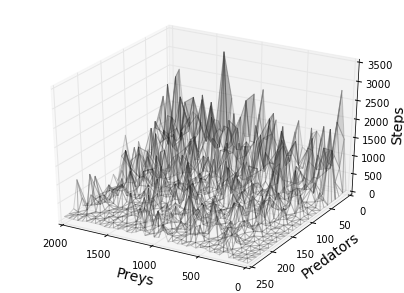

In [9]:
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.gca(projection='3d')
ax.plot_trisurf(pltdata[0], pltdata[1], pltdata[2], alpha=0.15, cmap=cm.Greys)
ax.set_xlabel('Preys', fontsize=14)
ax.set_ylabel('Predators', fontsize=14)
ax.set_zlabel('Steps', fontsize=14)
ax.invert_yaxis()
ax.invert_xaxis()
plt.show()

[1456.0, 721.33333333333337, 391.0, 925.33333333333337, 1986.6666666666667, 112.33333333333333, 399.0, 63.333333333333336, 67.333333333333329, 28.0, 53.666666666666664, 47.666666666666664, 30.0, 40.0, 19.333333333333332, 26.333333333333332, 31.0, 30.666666666666668, 26.333333333333332, 16.0, 17.333333333333332, 18.666666666666668, 11.333333333333334, 16.0, 30.666666666666668, 18.0]


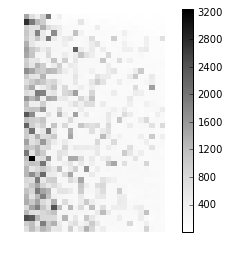

In [7]:
matrix = []
for a in range(0, len(preys)):
    lst = []
    for i in range(0, len(predators)):
        lst.append(pltdata[2][len(predators)*a + i])
    matrix.append(lst)
print(matrix[1])
fig = plt.figure()
#fig.set_size_inches(14, 10)
plt.imshow(matrix, interpolation='none')
plt.set_cmap(cm.Greys)
plt.colorbar();
plt.axis('off')
plt.show()